In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
#print(df.shape)
df = pd.read_csv("echocardiogram.csv")
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1.0,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0


In [5]:
median = df['age'].median()
df['age'].fillna(median, inplace=True)

In [6]:
median = df['fractionalshortening'].median()
df['fractionalshortening'].fillna(median, inplace=True)

In [7]:
median = df['epss'].median()
df['epss'].fillna(median, inplace=True)

In [8]:
dfmedian = df['wallmotion-score'].median()
df['wallmotion-score'].fillna(median, inplace=True)

In [9]:
dfmedian = df['lvdd'].median()
df['lvdd'].fillna(median, inplace=True)

In [10]:
dfmedian = df['mult'].median()
df['mult'].fillna(median, inplace=True)

In [11]:
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())

[1.10e+01 1.90e+01 1.60e+01 5.70e+01 2.60e+01 1.30e+01 5.00e+01 2.50e+01
 1.00e+01 5.20e+01 4.40e+01 5.00e-01 2.40e+01 2.20e+01 1.00e+00 7.50e-01
 5.00e+00 4.80e+01 2.90e+01 2.50e-01 3.60e+01 3.00e+00 2.70e+01 3.50e+01
 3.10e+01 3.20e+01 4.00e+01 4.60e+01 2.00e+00 3.70e+01 1.95e+01 2.00e+01
      nan 7.00e+00 1.20e+01 4.50e+01 5.30e+01 3.80e+01 9.00e+00 4.90e+01
 4.70e+01 4.10e+01 3.30e+01 1.50e+01 3.00e-02 2.30e+01 3.40e+01 2.10e+01
 5.50e+01 4.00e+00 1.25e+00 2.80e+01 1.70e+01 7.50e+00] 	 53
[ 0.  1. nan] 	 2
[71.    72.    55.    60.    57.    68.    62.    46.    54.    77.
 73.    69.    62.529 66.    85.    64.    35.    75.    65.    52.
 47.    63.    61.    80.    70.    79.    56.    67.    81.    59.
 58.    51.    50.    78.    86.    74.    53.    48.   ] 	 38
[ 0.  1. 77. nan] 	 3
[0.26  0.38  0.253 0.16  0.23  0.33  0.34  0.14  0.13  0.45  0.15  0.12
 0.25  0.07  0.09  0.22  0.18  0.17  0.19  0.3   0.205 0.21  0.4   0.61
 0.06  0.51  0.41  0.35  0.27  0.44  0.03  0.04  0

In [12]:
median = df['aliveat1'].median()
df['aliveat1'].fillna(median, inplace=True)

In [13]:
median = df['group'].median()
df['group'].fillna(median, inplace=True)

In [14]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [15]:
X = df.iloc[:,:12].values
y = df.iloc[:,12].values

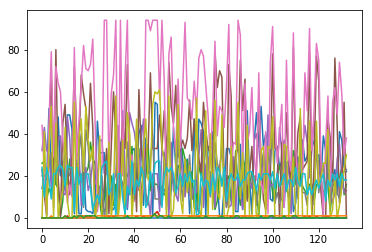

In [16]:
plt.plot(X)
plt.plot(y)
plt.show()

In [27]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
print(clf.predict(X_test))
clf.score(X_test, y_test)

[0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


0.8518518518518519

In [30]:
rf = RandomForestClassifier(n_estimators = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
print(rf.predict(X_test))
rf.score(X_test, y_test)

[0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]


0.8148148148148148

In [32]:
sv = svm.SVC(kernel = 'linear',C=1)
sv.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
print(sv.predict(X_test))
sv.score(X_test, y_test)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


0.8148148148148148

In [34]:
kf = KFold(n_splits=3)

In [35]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [36]:
folds = StratifiedKFold(n_splits=3)
scores_logistic = []
scores_svm = []
scores_rf = []
 
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(svm.SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sk_up\Anaconda3\lib\site-packag

In [37]:
scores_rf

[0.8888888888888888, 0.8863636363636364, 0.9090909090909091]

In [38]:
scores_svm

[0.7777777777777778, 0.7954545454545454, 0.8636363636363636]

In [39]:
scores_logistic

[0.9111111111111111, 0.8409090909090909, 0.8863636363636364]

In [40]:
#para = { 'learning_rate' : ['constant', 'invscaling', 'adaptive'],\
        #'activation' : ['identity', 'logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'] }
#grid = GridSearchCV(MLPClassifier(), para,  refit = True, verbose = 0)


#decisiontree
d=np.arange(1,10)
n=np.arange(1,10)
para={'max_depth':d,'n_estimators':n}
grid= GridSearchCV(RandomForestClassifier(), para, refit = True, verbose = 0)

#svm
'''cvalues= np.arange(1,10)
gammavalues= [0.001, 0.01, 0.1, 1]
para = {'C': cvalues, 'gamma' : gammavalues}
grid= GridSearchCV(svm.SVC(kernel='linear'), para,refit = True, verbose = 0)'''
                                                                                   
print(grid.fit(X_train, y_train))
                                          

C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


C:\Users\sk_up\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
print("Best param %s"%grid.best_params_)
print("Top SCORE FOUND {}".format(grid.best_score_))

Best param {'max_depth': 4, 'n_estimators': 8}
Top SCORE FOUND 0.9213483146067416
